<a href="https://colab.research.google.com/github/s34836/WUM/blob/main/Lab_08_Regularization-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization

## Early stopping

Early stopping can be implemented by adding a callback that will stop the training process when a given metric stops improving.

```python
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=2, restore_best_weights=True, verbose=1)

model.fit(..., callbacks=[early_stopping])
```

## L1/L2 Regularization

L1/L2 regularization adds a penalty to the loss function based on the magnitude of the weights:

$$ \tilde{J}(W) = J(W) + \lambda \sum_i w_i^2 $$
$$ \tilde{J}(W) = J(W) + \lambda \sum_i |w_i| $$

To apply this method, set the `kernel_regularizer` parameter, for example:

```python
tf.keras.layers.Dense(..., kernel_regularizer=tf.keras.regularizers.l2(0.01))
```

## Dropout Regularization

Dropout regularization works by randomly disabling the outputs of some neurons during training.
It can be implemented by adding `Dropout` layers directly after a given layer.

## Tasks
1. Load the `imdb` dataset from Lab 04. Create a mult-layer network to classify the data (you can use the example). Create a plot showing the loss function on training/validation data in each epoch and observe how the network overfits. Then train the network again using early stopping to stop the training process, when the validation loss stops decreasing.
2. Add L1/L2 regularization to the network created in Task 1. Select an appropriate regularization coefficient and type. Train the network without early stopping and plot learning curve. Compare this network with the one created in Task 1.
3. Add Dropout regularization to the network created in Task 1. Select the appropriate dropout rate. Draw the learning curve and compare the network with those from Tasks 1 and 2.
4. Add dropout regularization to a selected convolutional network from Lab 07. Compare how the network works with/without regularization.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Wczytanie danych
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

# Ujednolicenie długości sekwencji
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=200)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=200)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.5264 - loss: 0.6908 - val_accuracy: 0.6770 - val_loss: 0.6551
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7446 - loss: 0.5865 - val_accuracy: 0.8266 - val_loss: 0.4006
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8710 - loss: 0.3199 - val_accuracy: 0.8340 - val_loss: 0.3748
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9108 - loss: 0.2308 - val_accuracy: 0.8470 - val_loss: 0.3568
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9312 - loss: 0.1888 - val_accuracy: 0.8566 - val_loss: 0.3413
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9610 - loss: 0.1317 - val_accuracy: 0.8730 - val_loss: 0.3021
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9765 - loss: 0.0966 - val_accuracy: 0.8684 - val_loss: 0.3203
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9833 - loss: 0.0762 - val_accuracy: 0.8600 - val_loss: 0.3573
Ep

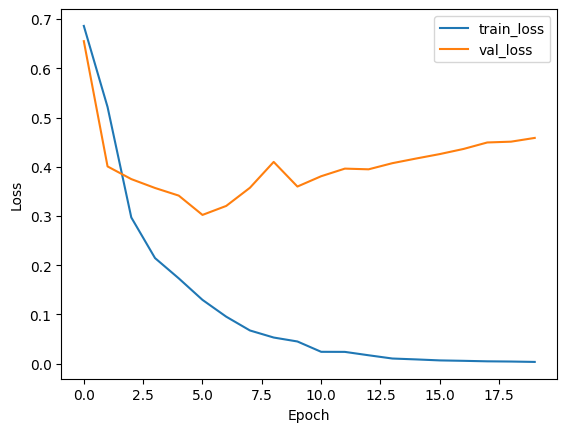

In [2]:
# To jest prosty model - bez regularyzacji

model = keras.Sequential([
    keras.layers.Embedding(10000, 16, input_length=200),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.5163 - loss: 0.6919 - val_accuracy: 0.6374 - val_loss: 0.6604
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7335 - loss: 0.5857 - val_accuracy: 0.8472 - val_loss: 0.3729
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8831 - loss: 0.3005 - val_accuracy: 0.8380 - val_loss: 0.3594
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9172 - loss: 0.2168 - val_accuracy: 0.8746 - val_loss: 0.3008
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9496 - loss: 0.1544 - val_accuracy: 0.8746 - val_loss: 0.2977
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9649 - loss: 0.1219 - val_accuracy: 0.8802 - val_loss: 0.2952
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9838 - loss: 0.0801 - val_accuracy: 0.8738 - val_loss: 0.3144
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9906 - loss: 0.0581 - val_accuracy: 0.8714 - val_loss: 0.3296
Ep

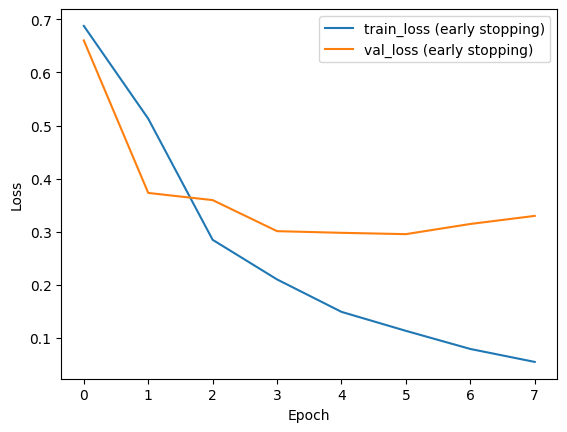

In [43]:
# model z early stopping
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True,
    verbose=1
)

model2 = keras.Sequential([
    keras.layers.Embedding(10000, 16, input_length=200),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history2 = model2.fit(
    X_train, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)
plt.plot(history2.history["loss"], label="train_loss (early stopping)")
plt.plot(history2.history["val_loss"], label="val_loss (early stopping)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.5133 - loss: 0.7170 - val_accuracy: 0.6444 - val_loss: 0.6906
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7084 - loss: 0.6472 - val_accuracy: 0.8282 - val_loss: 0.4531
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8643 - loss: 0.3887 - val_accuracy: 0.8672 - val_loss: 0.3642
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9133 - loss: 0.2860 - val_accuracy: 0.8770 - val_loss: 0.3434
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9377 - loss: 0.2418 - val_accuracy: 0.8616 - val_loss: 0.3695
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9469 - loss: 0.2183 - val_accuracy: 0.8670 - val_loss: 0.3586
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9629 - loss: 0.1867 - val_accuracy: 0.8770 - val_loss: 0.3412
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9752 - loss: 0.1644 - val_accuracy: 0.8786 - val_loss: 0.3463
E

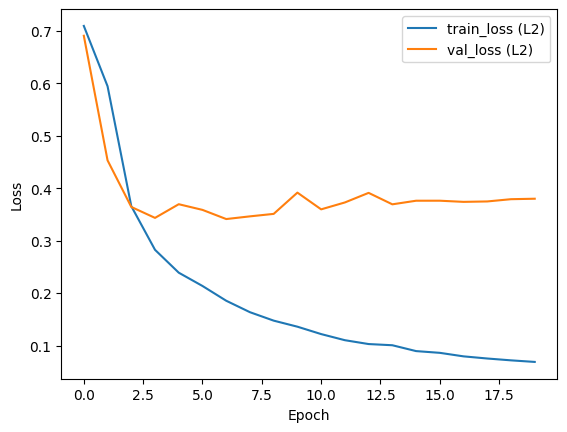

In [4]:
#task 2 L1/L2 regularization
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf

model_reg = keras.Sequential([
    keras.layers.Embedding(10000, 16, input_length=200),
    keras.layers.Flatten(),
    keras.layers.Dense(
        16,
        activation="relu",
        kernel_regularizer=keras.regularizers.l2(0.001)
    ),
    keras.layers.Dense(
        1,
        activation="sigmoid",
        kernel_regularizer=keras.regularizers.l2(0.001)
    )
])

model_reg.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_reg = model_reg.fit(
    X_train, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)
plt.plot(history_reg.history["loss"], label="train_loss (L2)")
plt.plot(history_reg.history["val_loss"], label="val_loss (L2)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

Epoch 1/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.5073 - loss: 0.6929 - val_accuracy: 0.5902 - val_loss: 0.6840
Epoch 2/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6658 - loss: 0.6563 - val_accuracy: 0.8054 - val_loss: 0.4891
Epoch 3/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8289 - loss: 0.4289 - val_accuracy: 0.8672 - val_loss: 0.3319
Epoch 4/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8936 - loss: 0.2913 - val_accuracy: 0.8138 - val_loss: 0.4319
Epoch 5/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9016 - loss: 0.2731 - val_accuracy: 0.8744 - val_loss: 0.2962
Epoch 6/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9458 - loss: 0.1826 - val_accuracy: 0.8734 - val_loss: 0.3020
Epoch 7/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9596 - loss: 0.1438 - val_accuracy: 0.8748 - val_loss: 0.2969
Epoch 8/20
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9719 - loss: 0.1155 - val_accuracy: 0.8404 - val_loss

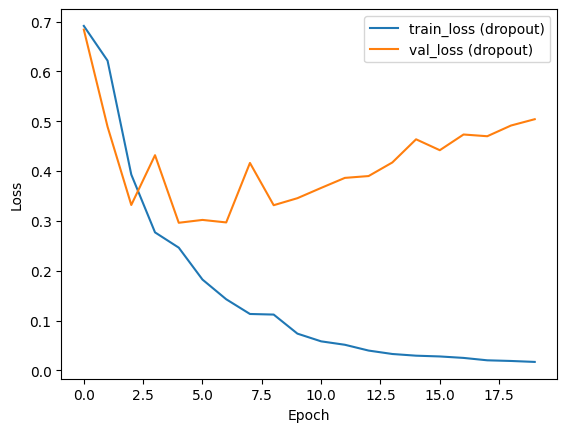

In [5]:
# model z dropout
from tensorflow import keras
import matplotlib.pyplot as plt

model_do = keras.Sequential([
    keras.layers.Embedding(10000, 16, input_length=200),
    keras.layers.Flatten(),

    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dropout(0.5),   # dropout 50%

    keras.layers.Dense(1, activation="sigmoid")
])

model_do.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history_do = model_do.fit(
    X_train, y_train,
    epochs=20,
    batch_size=512,
    validation_split=0.2,
    verbose=1
)
plt.plot(history_do.history["loss"], label="train_loss (dropout)")
plt.plot(history_do.history["val_loss"], label="val_loss (dropout)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

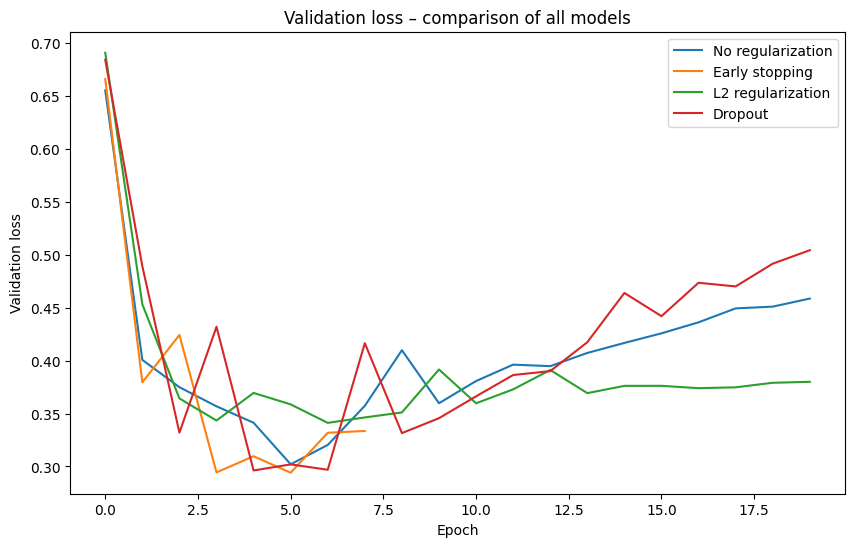

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# 1. Bez regularyzacji
plt.plot(history.history["val_loss"], label="No regularization")

# 2. Early stopping
plt.plot(history2.history["val_loss"], label="Early stopping")

# 3. L2 regularization
plt.plot(history_reg.history["val_loss"], label="L2 regularization")

# 4. Dropout
plt.plot(history_do.history["val_loss"], label="Dropout")

plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.title("Validation loss – comparison of all models")
plt.legend()
plt.show()

In [40]:
import tensorflow as tf
import tensorflow_datasets as tfds

# load dataset
(ds_train, ds_valid), ds_info = tfds.load(
    "cats_vs_dogs",
    split=["train[:80%]", "train[80%:]"],
    with_info=True,
    as_supervised=True
)

# preprocess
image_size = (224, 224)

def preprocess(image, label):
    image = tf.image.resize(image, image_size)
    image = image / 255.0
    return image, label

batch_size = 32
train = ds_train.map(preprocess).batch(batch_size).prefetch(1)
valid = ds_valid.map(preprocess).batch(batch_size).prefetch(1)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.UIMT28_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [41]:
# Model without dropout
def build_model_2():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# Model with dropout
def build_model_2_dropout():
    return tf.keras.Sequential([
        tf.keras.layers.Input(shape=(224, 224, 3)),
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),      # <-- dropout
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model_no_do = build_model_2()
model_do = build_model_2_dropout()

model_no_do.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_do.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Training WITHOUT dropout")
history_no_do = model_no_do.fit(train, epochs=5, validation_data=valid)

print("\nTraining WITH dropout")
history_do = model_do.fit(train, epochs=5, validation_data=valid)

Training WITHOUT dropout
Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.6085 - loss: 0.8566 - val_accuracy: 0.6851 - val_loss: 0.5961
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 48s 83ms/step - accuracy: 0.7376 - loss: 0.5283 - val_accuracy: 0.7431 - val_loss: 0.5303
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.8264 - loss: 0.3867 - val_accuracy: 0.7397 - val_loss: 0.6042
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9076 - loss: 0.2282 - val_accuracy: 0.7354 - val_loss: 0.8133
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.9469 - loss: 0.1374 - val_accuracy: 0.7300 - val_loss: 1.0961

Training WITH dropout
Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 47s 75ms/step - accuracy: 0.6107 - loss: 0.7144 - val_accuracy: 0.6836 - val_loss: 0.5977
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 69ms/step - accuracy: 0.7300 - loss: 0.5453 - val_accuracy: 0.7511 - val_loss: 0.5180
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/s

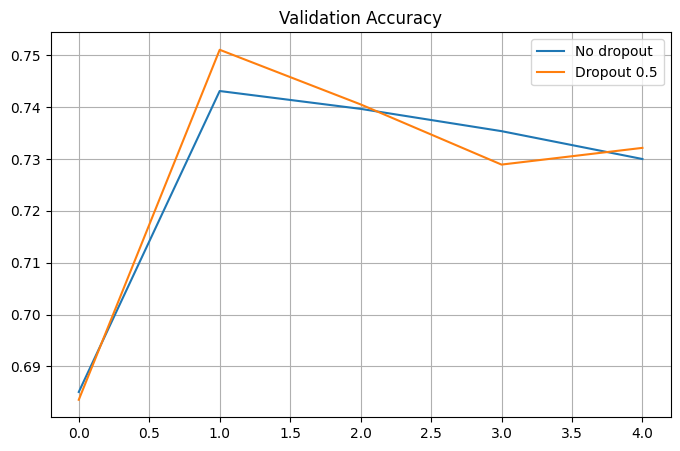

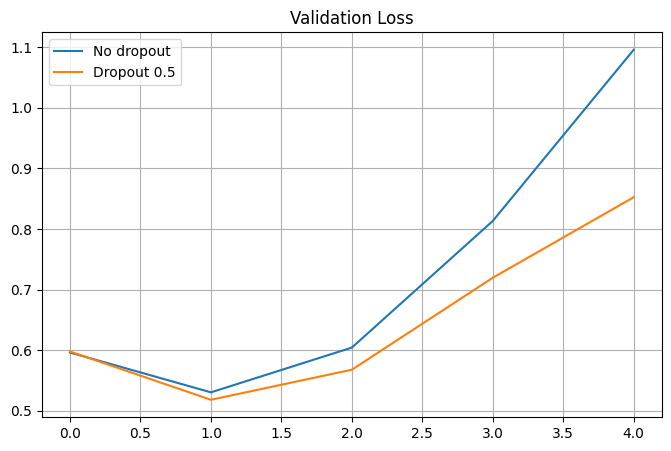

In [42]:
import matplotlib.pyplot as plt

# accuracy
plt.figure(figsize=(8,5))
plt.plot(history_no_do.history['val_accuracy'], label='No dropout')
plt.plot(history_do.history['val_accuracy'], label='Dropout 0.5')
plt.title("Validation Accuracy")
plt.legend()
plt.grid()
plt.show()

# loss
plt.figure(figsize=(8,5))
plt.plot(history_no_do.history['val_loss'], label='No dropout')
plt.plot(history_do.history['val_loss'], label='Dropout 0.5')
plt.title("Validation Loss")
plt.legend()
plt.grid()
plt.show()